### Problem Statement
An aviation company that provides domestic as well as international trips to the customers now wants to apply atargeted approach instead of reaching out to each of the customers. This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the userpage of the targeted customerswho have a high propensity to take up the product.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

import sklearn.metrics as metrics
from sklearn import model_selection

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

# Project Notes - 1

### **Read the Dataset**

In [ ]:
dataset_url = 'Social Media Data for DSBA.csv'

social_media_data = pd.read_csv(dataset_url)

In [ ]:
social_media_data.head()

In [ ]:
social_media_data.tail()

### Rename the column names as per the data dictionary for ease of understanding

In [ ]:
social_media_data.rename(columns = {'Taken_product':'Buy_ticket'}, inplace = True)

## **2. Data Report**

### **Check the number of rows (observations) and the number of columns (variables)**

In [ ]:
print('The number of rows (observations) is',social_media_data.shape[0],'\n''The number of columns (variables) is',social_media_data.shape[1])

### **Check the Data Type of the Variables**

In [ ]:
social_media_data.info()

### **Check the basic measures of descriptive statistics for the continuous variables**

In [ ]:
social_media_data.describe().T

## **3. Exploratory Data Analysis**

### **Check for different types of data in the columns**

**Removal of unwanted variables (If needed)**

In [ ]:
social_media_data['Buy_ticket'].value_counts()

In [ ]:
social_media_data['preferred_device'].value_counts()

Here, all the records except for `Laptop` will be grouped together under `Mobile`.

In [ ]:
social_media_data['preferred_device'].mask(social_media_data['preferred_device'] != "Laptop", "Mobile", inplace=True)

In [ ]:
social_media_data['preferred_device'].value_counts()

In [ ]:
social_media_data['preferred_location_type'].value_counts()

In [ ]:
# Grouping Variables like `Game`, `OTT`, `Social media` and `Movile` under `Entertainment` makes sense here.

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Game", "Entertainment", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Movie", "Entertainment", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "OTT", "Entertainment", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Social media", "Entertainment", inplace=True)

In [ ]:
# Grouping variables like `Tour  Travel` and `Tour and Travel` under `Others` makes sense here. 
# As tour and travel does not generally point towards anything particular.

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Tour  Travel", "Other", inplace=True)

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Tour and Travel", "Other", inplace=True)

In [ ]:
# Variables like `Trekking` and `Hill Stations` are not similar to some extent.
# As, `Hill Stations` make up only 108 records, I will be putting it under `Trekking` to avoid any hassle.

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Hill Stations", "Trekking", inplace=True)

In [ ]:
# lastly, `Big Cities` can be anywhere and can be also easily belong to category like `Medical`, `Financial` or even `Entertainment`
# to avoid this, I will group it under `Other`

social_media_data['preferred_location_type'].mask(social_media_data['preferred_location_type'] == "Big Cities", "Other", inplace=True)

In [ ]:
social_media_data['preferred_location_type'].value_counts()

In [ ]:
social_media_data['Adult_flag'].value_counts()

The name of the variable `Adult_flag` leads to some misconception, as it clearly depicts the number of adults,
I will be renaming the column name to `number_of_adults`.

In [ ]:
social_media_data.rename(columns = {'Adult_flag':'number_of_adults'}, inplace = True)

In [ ]:
social_media_data['number_of_adults'].value_counts()

In [ ]:
social_media_data['following_company_page'].value_counts()

`following_company_page` has different values for Boolean, No, Yes, 1 and 0.

For the dataset, I will assume 1 as `Yes` and 0 as `No`

In [ ]:
social_media_data['following_company_page'].mask(social_media_data['following_company_page'] == "1", "Yes", inplace=True)

In [ ]:
social_media_data['following_company_page'].mask(social_media_data['following_company_page'] == "0", "No", inplace=True)

In [ ]:
social_media_data['following_company_page'].value_counts()

In [ ]:
social_media_data['working_flag'].value_counts()

In [ ]:
# member_in_family contains few rows where '3' is represented as 'Three'.
# Replacing them.

social_media_data['member_in_family'].mask(social_media_data['member_in_family'] == "Three", "3", inplace=True)

### **Check the Data Type of the Variables**

In [ ]:
social_media_data.info()

### **Check the basic measures of descriptive statistics for the continuous variables**

In [ ]:
social_media_data.describe().T

In [ ]:
import pandas_profiling as pdp

In [ ]:
eda_profile_social_media_data = pdp.ProfileReport(social_media_data)

In [ ]:
# Since the HTML report is already generated, Commenting out the below code to save execution time.

# eda_profile_social_media_data.to_file("eda_profile_social_media_data.html")

#### Missing Value treatment

From the EDA report generated, it can be noted that

* `Yearly_avg_view_on_travel_page` has **581 (4.9%)** missing values
* `total_likes_on_outstation_checkin_given` has **381 (3.2%)** missing values
* `Yearly_avg_comment_on_travel_page` has **206 (1.8%)** missing values
* `yearly_avg_Outstation_checkins` has **75 (0.6%)** missing values
* `preferred_location_type` has **31 (0.3%)** missing values
* `following_company_page` has **103 (0.9%)** missing values

In [ ]:
social_media_data.isnull().sum()

#### Since the total number of null value rows are 1263 which only makes upto 10% of the data, we can safely drop the rows.

In [ ]:
social_media_data_null_drop = social_media_data.dropna()

In [ ]:
social_media_data_null_drop.isnull().sum()

### Outliers

In [ ]:
# construct box plot for continuous variables
cont = social_media_data_null_drop.dtypes[(social_media_data_null_drop.dtypes != 'object')].index

In [ ]:
def outliers_continuous(column, nbins):
    fig_dims = (20, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=fig_dims)
    sns.boxplot(x= column, data=social_media_data_null_drop)

In [ ]:
cont = cont.drop(cont[0]) # Drop the userId
cont = cont.drop(cont[7]) # Drop the number of adults

In [ ]:
cont

In [ ]:
%matplotlib inline

for column in cont:
    outliers_continuous(column, 20)

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in social_media_data_null_drop[cont].columns:
    lr,ur=remove_outlier(social_media_data_null_drop[column])
    social_media_data_null_drop[column]=np.where(social_media_data_null_drop[column]>ur,ur,social_media_data_null_drop[column])
    social_media_data_null_drop[column]=np.where(social_media_data_null_drop[column]<lr,lr,social_media_data_null_drop[column])

In [ ]:
for column in cont:
    outliers_continuous(column, 20)

In [ ]:
social_media_data_null_drop.info()

Here **yearly_avg_Outstation_checkins** and  **member_in_family** are clearly numeric, but it is being displayed as object.
Converting them to numerical based on below observations.

In [ ]:
social_media_data_null_drop['yearly_avg_Outstation_checkins'].value_counts()

There is a row where the value is **'*'**. I will be dropping this row

In [ ]:
# get names of indexes for which
# column yearly_avg_Outstation_checkins has value *

index_names = social_media_data_null_drop[ social_media_data_null_drop['yearly_avg_Outstation_checkins'] == '*' ].index

In [ ]:
social_media_data_null_drop.drop(index_names, inplace = True)

In [ ]:

social_media_data_null_drop['yearly_avg_Outstation_checkins'] = social_media_data_null_drop['yearly_avg_Outstation_checkins'].astype(object).astype(int)

In [ ]:
social_media_data_null_drop['member_in_family'] = social_media_data_null_drop['member_in_family'].astype(object).astype(int)

In [ ]:
social_media_data_null_drop.info()

In [ ]:
# Since the HTML report is already generated, Commenting out the below code to save execution time.
eda_profile_social_media_data_post_cleaning = pdp.ProfileReport(social_media_data_null_drop)
eda_profile_social_media_data_post_cleaning.to_file("eda_profile_social_media_data_post_cleaning.html")

In [ ]:
social_media_data_null_drop['number_of_adults'].value_counts()

### One Hot Encoding of the Categorical Values

In [ ]:
social_media_data_encoded = pd.get_dummies(social_media_data_null_drop, prefix='location_', columns=['preferred_location_type']) #This function does One-Hot-Encoding on categorical text

In [ ]:
social_media_data_encoded['following_company_page'] = social_media_data_encoded['following_company_page'].map({'Yes': 1, 'No': 0})

In [ ]:
social_media_data_encoded['working_flag'] = social_media_data_encoded['working_flag'].map({'Yes': 1, 'No': 0})

In [ ]:
social_media_data_encoded['Buy_ticket'] = social_media_data_encoded['Buy_ticket'].map({'Yes': 1, 'No': 0})

In [ ]:
social_media_data_encoded.head()

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(social_media_data_encoded.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [ ]:
social_media_data_null_drop.head()

### Seperate data set in to two, by dividing based on the preferred device. [Mobile, Laptop]

In [ ]:
social_media_data_laptop = social_media_data_encoded.drop(social_media_data_encoded.loc[social_media_data_encoded['preferred_device']=='Mobile'].index)

In [ ]:
# Since the data is only for Laptop devices, we can drop the preferred device column
social_media_data_laptop.drop(['preferred_device'], axis=1, inplace=True)

In [ ]:
social_media_data_laptop.reset_index(drop=True)

### **Check the number of rows (observations) and the number of columns (variables) in Laptop**

In [ ]:
print('The number of rows (observations) is',social_media_data_laptop.shape[0],'\n''The number of columns (variables) is',social_media_data_laptop.shape[1])

In [ ]:
social_media_data_mobile = social_media_data_encoded.drop(social_media_data_encoded.loc[social_media_data_encoded['preferred_device']=='Laptop'].index, inplace=False)

In [ ]:
# Since the data is only for Mobile devices, we can drop the preferred device column
social_media_data_mobile.drop(['preferred_device'], axis=1, inplace=True)

In [ ]:
social_media_data_mobile.reset_index(drop=True)

### **Check the number of rows (observations) and the number of columns (variables) in Mobile**

In [ ]:
print('The number of rows (observations) is',social_media_data_mobile.shape[0],'\n''The number of columns (variables) is',social_media_data_mobile.shape[1])

In [ ]:
# Write the laptop and mobile data to a csv file.
social_media_data_laptop.to_csv('social_media_data_laptop.csv')

social_media_data_mobile.to_csv('social_media_data_mobile.csv')


**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Project Notes - 2

In [2]:
social_media_data_laptop = pd.read_csv('social_media_data_laptop.csv')

social_media_data_mobile = pd.read_csv('social_media_data_mobile.csv')

In [3]:
# Drop Unnamed: 0 column
social_media_data_laptop.drop(['Unnamed: 0'], axis = 1, inplace=True)

social_media_data_mobile.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

## Naive Bayes

In [5]:
# Gaussian algorithm from Naive Bayes

from sklearn.naive_bayes import GaussianNB

### For Mobile Dataset

In [6]:
X = social_media_data_mobile.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_mobile['Buy_ticket'] # Predicted class (1=True, 0=False)

In [7]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [8]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(social_media_data_mobile.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(social_media_data_mobile.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [9]:
# create the model
naivebayes_mobile_model = GaussianNB()

naivebayes_mobile_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance of our model with training data

In [10]:
naivebayes_mobile_train_predict = naivebayes_mobile_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, naivebayes_mobile_train_predict)))

Model Accuracy: 0.8592


### Performance of our model with testing data

In [11]:
naivebayes_mobile_test_predict = naivebayes_mobile_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, naivebayes_mobile_test_predict)))

Model Accuracy: 0.8587


### Lets check the confusion matrix and classification report

Confusion Matrix Test Data


<AxesSubplot:>

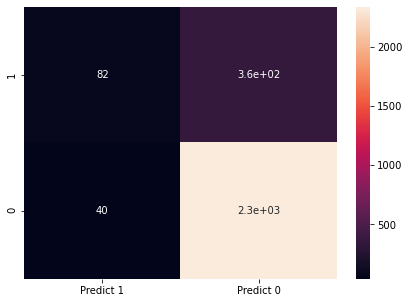

In [12]:
print("Confusion Matrix Test Data")
cm=metrics.confusion_matrix(y_test, naivebayes_mobile_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [13]:
print("Classification Report")
print(metrics.classification_report(y_test, naivebayes_mobile_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.19      0.29       440
           0       0.87      0.98      0.92      2377

    accuracy                           0.86      2817
   macro avg       0.77      0.58      0.61      2817
weighted avg       0.84      0.86      0.82      2817



In [14]:
predictions_test = pd.DataFrame({"accuracy": metrics.accuracy_score(y_test, naivebayes_mobile_test_predict),
                    "recall_on_true": 0.19,
                    "recall_on_false": 0.98
                   },index=['naivebayes_mobile_model'])
predictions_test

,accuracy,recall_on_true,recall_on_false
naivebayes_mobile_model,0.858715,0.19,0.98


### For Laptop Dataset

In [15]:
X = social_media_data_laptop.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_laptop['Buy_ticket'] # Predicted class (1=True, 0=False)

In [16]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [17]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(social_media_data_laptop.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(social_media_data_laptop.index)) * 100))

69.95% data is in training set
30.05% data is in test set


In [18]:
# create the model
naivebayes_laptop_model = GaussianNB()

naivebayes_laptop_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance of our model with training data

In [19]:
naivebayes_laptop_train_predict = naivebayes_laptop_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, naivebayes_laptop_train_predict)))

Model Accuracy: 0.8297


### Performance of our model with testing data

In [20]:
naivebayes_laptop_test_predict = naivebayes_laptop_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, naivebayes_laptop_test_predict)))

Model Accuracy: 0.8198


### Lets check the confusion matrix and classification report

Confusion Matrix


<AxesSubplot:>

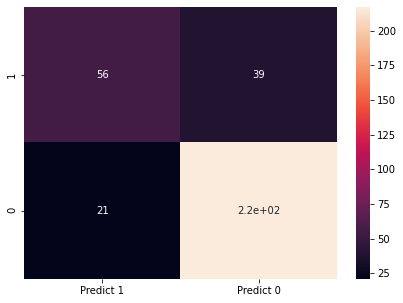

In [21]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, naivebayes_laptop_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [22]:
print("Classification Report")
print(metrics.classification_report(y_test, naivebayes_laptop_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.59      0.65        95
           0       0.85      0.91      0.88       238

    accuracy                           0.82       333
   macro avg       0.79      0.75      0.76       333
weighted avg       0.81      0.82      0.81       333



In [23]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(y_test, naivebayes_laptop_test_predict),
                    "recall_on_true": 0.59,
                    "recall_on_false": 0.91
                   },index=['naivebayes_laptop_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false
naivebayes_mobile_model,0.858715,0.19,0.98
naivebayes_laptop_model,0.819820,0.59,0.91


## Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### For Mobile Dataset

In [25]:
X = social_media_data_mobile.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_mobile['Buy_ticket'] # Predicted class (1=True, 0=False)

In [26]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=1,stratify = Y)

In [27]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(social_media_data_mobile.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(social_media_data_mobile.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [28]:
# create the model
lda = LinearDiscriminantAnalysis()
lda_mobile_model = lda.fit(X_train,Y_train)

### Performance of our model with training data

In [29]:
lda_mobile_train_predict = lda_mobile_model.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, lda_mobile_train_predict)))

Model Accuracy: 0.8659


### Performance of our model with testing data

In [30]:
lda_mobile_test_predict = lda_mobile_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lda_mobile_test_predict)))

Model Accuracy: 0.8626


### Training Data and Test Data Confusion Matrix Comparison

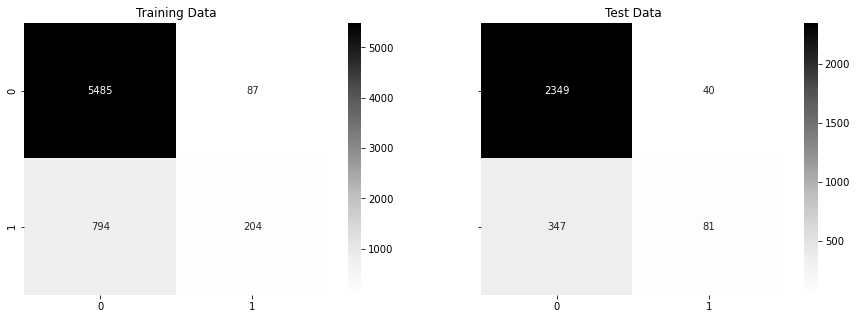

In [31]:
rcParams['figure.figsize'] = 15,5

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,lda_mobile_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,lda_mobile_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [32]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,lda_mobile_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,lda_mobile_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.98      0.93      5572
           1       0.70      0.20      0.32       998

    accuracy                           0.87      6570
   macro avg       0.79      0.59      0.62      6570
weighted avg       0.85      0.87      0.83      6570
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2389
           1       0.67      0.19      0.30       428

    accuracy                           0.86      2817
   macro avg       0.77      0.59      0.61      2817
weighted avg       0.84      0.86      0.83      2817
 



### Probability prediction for the training and test data

In [33]:
# Training Data Probability Prediction
pred_prob_lda_mobile_train = lda_mobile_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_lda_mobile_test = lda_mobile_model.predict_proba(X_test)

AUC for the Training Data: 0.774
AUC for the Test Data: 0.778


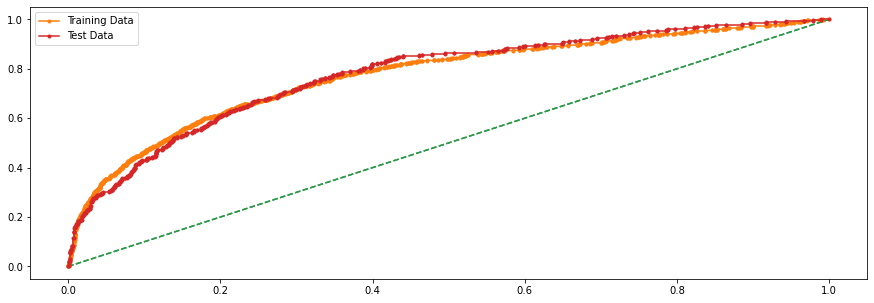

In [34]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_lda_mobile_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_lda_mobile_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_lda_mobile_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_lda_mobile_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [35]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(Y_test, lda_mobile_test_predict),
                    "recall_on_true": 0.19,
                    "recall_on_false": 0.98,
                    "auc_score": 0.778
                   },index=['lda_mobile_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778


### For Laptop Dataset

In [36]:
X = social_media_data_laptop.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_laptop['Buy_ticket'] # Predicted class (1=True, 0=False)

In [37]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=1,stratify = Y)

In [38]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(social_media_data_laptop.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(social_media_data_laptop.index)) * 100))

69.95% data is in training set
30.05% data is in test set


In [39]:
# create the model
lda = LinearDiscriminantAnalysis()
lda_laptop_model = lda.fit(X_train,Y_train)

### Performance of our model with training data

In [40]:
lda_laptop_train_predict = lda_laptop_model.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_train, lda_laptop_train_predict)))

Model Accuracy: 0.8335


### Performance of our model with testing data

In [41]:
lda_laptop_test_predict = lda_laptop_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lda_laptop_test_predict)))

Model Accuracy: 0.8108


### Training Data and Test Data Confusion Matrix Comparison

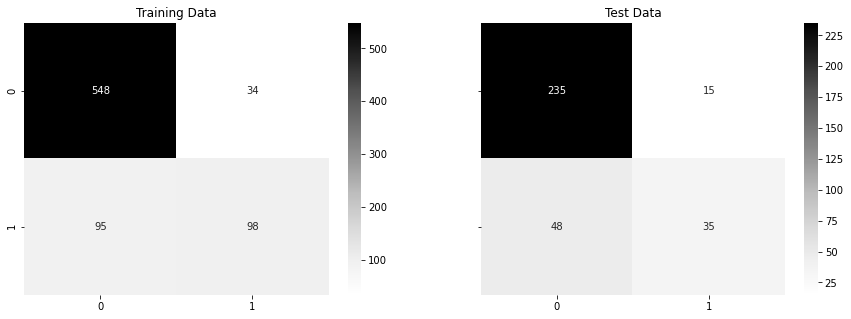

In [42]:
rcParams['figure.figsize'] = 15,5

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,lda_laptop_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,lda_laptop_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [43]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,lda_laptop_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,lda_laptop_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.94      0.89       582
           1       0.74      0.51      0.60       193

    accuracy                           0.83       775
   macro avg       0.80      0.72      0.75       775
weighted avg       0.82      0.83      0.82       775
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.83      0.94      0.88       250
           1       0.70      0.42      0.53        83

    accuracy                           0.81       333
   macro avg       0.77      0.68      0.70       333
weighted avg       0.80      0.81      0.79       333
 



### Probability prediction for the training and test data

In [44]:
# Training Data Probability Prediction
pred_prob_lda_laptop_train = lda_laptop_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_lda_laptop_test = lda_laptop_model.predict_proba(X_test)

AUC for the Training Data: 0.836
AUC for the Test Data: 0.817


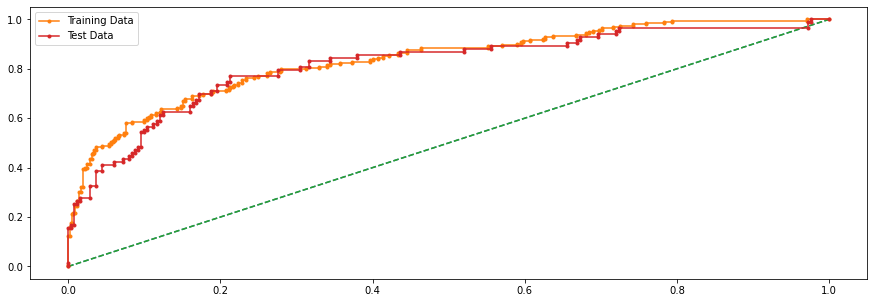

In [45]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_lda_laptop_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_lda_laptop_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_lda_laptop_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_lda_laptop_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [46]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(Y_test, lda_laptop_test_predict),
                    "recall_on_true": 0.42,
                    "recall_on_false": 0.94,
                    "auc_score": 0.817
                   },index=['lda_laptop_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778
lda_laptop_model,0.810811,0.42,0.94,0.817


## Naive Bayes with SMOT

In [47]:
from imblearn.over_sampling import SMOTE

### For Mobile Dataset

In [48]:
X = social_media_data_mobile.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_mobile['Buy_ticket'] # Predicted class (1=True, 0=False)

In [49]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [50]:
## Let's check the shape before SMOTE
x_train.shape

(6570, 21)

In [51]:
sm = SMOTE(random_state=1)

**SMOTE** is only applied on the train data set

In [52]:
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [53]:
## Let's check the shape after SMOTE
X_train_res.shape

(11168, 21)

In [54]:
naivebayes_sm_mobile_model = GaussianNB()

naivebayes_sm_mobile_model.fit(X_train_res, y_train_res)

GaussianNB()

### Performance of our model with training data

In [55]:
naivebayes_sm_mobile_train_predict = naivebayes_sm_mobile_model.predict(X_train_res)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_res, naivebayes_sm_mobile_train_predict)))

Model Accuracy: 0.6431


### Performance of our model with testing data

In [56]:
naivebayes_sm_mobile_test_predict = naivebayes_sm_mobile_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, naivebayes_sm_mobile_test_predict)))

Model Accuracy: 0.4736


### Lets check the confusion matrix and classification report

Confusion Matrix


<AxesSubplot:>

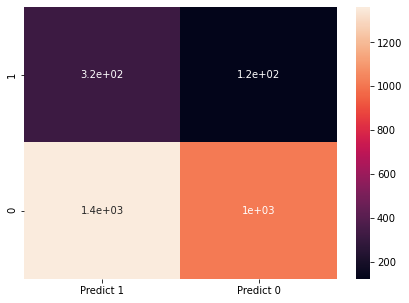

In [57]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, naivebayes_sm_mobile_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [58]:
print("Classification Report")
print(metrics.classification_report(y_test, naivebayes_sm_mobile_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.19      0.72      0.30       440
           0       0.89      0.43      0.58      2377

    accuracy                           0.47      2817
   macro avg       0.54      0.58      0.44      2817
weighted avg       0.78      0.47      0.53      2817



In [59]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(y_test, naivebayes_sm_mobile_test_predict),
                    "recall_on_true": 0.72,
                    "recall_on_false": 0.43
                   },index=['naivebayes_sm_mobile_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778
lda_laptop_model,0.810811,0.42,0.94,0.817
naivebayes_sm_mobile_model,0.473553,0.72,0.43,NaN


### For Laptop Dataset

In [60]:
X = social_media_data_laptop.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_laptop['Buy_ticket'] # Predicted class (1=True, 0=False)

In [61]:
Y.value_counts()

0    832
1    276
Name: Buy_ticket, dtype: int64

In [62]:
# Split X and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [63]:
## Let's check the shape before SMOTE
x_train.shape

(775, 21)

In [64]:
sm = SMOTE(random_state=1)

**SMOTE** is only applied on the train data set

In [65]:
## Let's check the shape after SMOTE
X_train_res.shape

(11168, 21)

In [66]:
naivebayes_sm_laptop_model = GaussianNB()

naivebayes_sm_laptop_model.fit(X_train_res, y_train_res)

GaussianNB()

### Performance of our model with training data

In [67]:
naivebayes_sm_laptop_train_predict = naivebayes_sm_laptop_model.predict(X_train_res)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_res, naivebayes_sm_laptop_train_predict)))

Model Accuracy: 0.6431


### Performance of our model with testing data

In [68]:
naivebayes_sm_laptop_test_predict = naivebayes_sm_laptop_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, naivebayes_sm_laptop_test_predict)))

Model Accuracy: 0.5796


### Lets check the confusion matrix and classification report

Confusion Matrix


<AxesSubplot:>

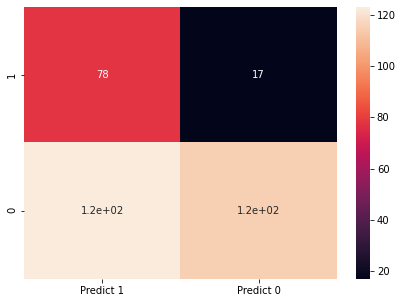

In [69]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, naivebayes_sm_laptop_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [70]:
print("Classification Report")
print(metrics.classification_report(y_test, naivebayes_sm_laptop_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.39      0.82      0.53        95
           0       0.87      0.48      0.62       238

    accuracy                           0.58       333
   macro avg       0.63      0.65      0.57       333
weighted avg       0.73      0.58      0.59       333



In [71]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(y_test, naivebayes_sm_laptop_test_predict),
                    "recall_on_true": 0.82,
                    "recall_on_false": 0.48
                   },index=['naivebayes_sm_laptop_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778
lda_laptop_model,0.810811,0.42,0.94,0.817
naivebayes_sm_mobile_model,0.473553,0.72,0.43,NaN
naivebayes_sm_laptop_model,0.579580,0.82,0.48,NaN


## Linear Discriminant Analysis with SMOT

### For Mobile Dataset

In [72]:
X = social_media_data_mobile.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_mobile['Buy_ticket'] # Predicted class (1=True, 0=False)

In [73]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=1,stratify = Y)

In [74]:
## Let's check the shape before SMOTE
X_train.shape

(6570, 21)

In [75]:
sm = SMOTE(random_state=1)

In [76]:
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [77]:
## Let's check the shape after SMOTE
X_train_res.shape

(11144, 21)

In [78]:
# create the model
lda = LinearDiscriminantAnalysis()
lda_sm_mobile_model = lda.fit(X_train_res,y_train_res)

### Performance of our model with training data

In [79]:
lda_mobile_train_predict = lda_sm_mobile_model.predict(X_train_res)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_res, lda_mobile_train_predict)))

Model Accuracy: 0.8056


### Performance of our model with testing data

In [80]:
lda_mobile_test_predict = lda_sm_mobile_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lda_mobile_test_predict)))

Model Accuracy: 0.8474


### Training Data and Test Data Confusion Matrix Comparison

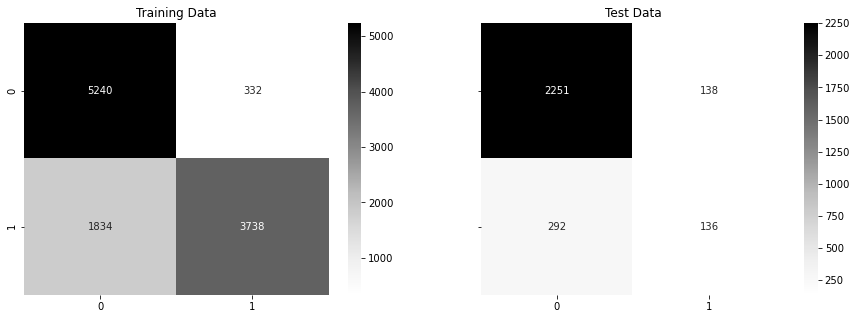

In [81]:
rcParams['figure.figsize'] = 15,5

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,lda_mobile_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,lda_mobile_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [82]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,lda_mobile_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,lda_mobile_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.94      0.83      5572
           1       0.92      0.67      0.78      5572

    accuracy                           0.81     11144
   macro avg       0.83      0.81      0.80     11144
weighted avg       0.83      0.81      0.80     11144
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2389
           1       0.50      0.32      0.39       428

    accuracy                           0.85      2817
   macro avg       0.69      0.63      0.65      2817
weighted avg       0.83      0.85      0.83      2817
 



### Probability prediction for the training and test data

In [83]:
# Training Data Probability Prediction
pred_prob_lda_mobile_train = lda_sm_mobile_model.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_lda_mobile_test = lda_sm_mobile_model.predict_proba(X_test)

AUC for the Training Data: 0.886
AUC for the Test Data: 0.773


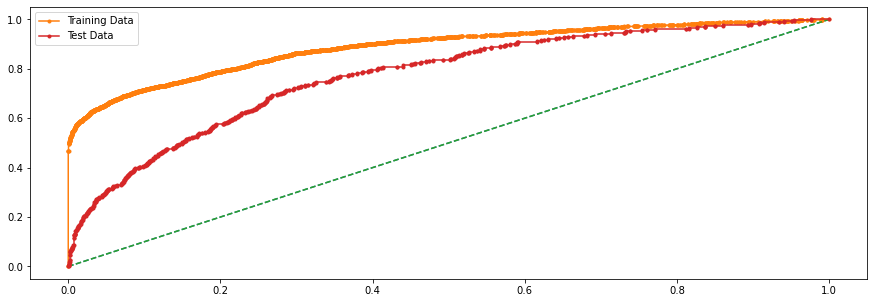

In [84]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train_res,pred_prob_lda_mobile_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_lda_mobile_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_lda_mobile_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_lda_mobile_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [85]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(Y_test, lda_mobile_test_predict),
                    "recall_on_true": 0.32,
                    "recall_on_false": 0.94,
                    "auc_score": 0.773
                   },index=['lda_sm_mobile_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778
lda_laptop_model,0.810811,0.42,0.94,0.817
naivebayes_sm_mobile_model,0.473553,0.72,0.43,NaN
naivebayes_sm_laptop_model,0.579580,0.82,0.48,NaN
lda_sm_mobile_model,0.847355,0.32,0.94,0.773


### For Laptop Dataset

In [86]:
X = social_media_data_laptop.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_laptop['Buy_ticket'] # Predicted class (1=True, 0=False)

In [87]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=1,stratify = Y)

In [88]:
sm = SMOTE(random_state=1)

In [89]:
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [90]:
# create the model
lda = LinearDiscriminantAnalysis()
lda_sm_laptop_model = lda.fit(X_train_res,y_train_res)

### Performance of our model with training data

In [91]:
lda_laptop_train_predict = lda_sm_laptop_model.predict(X_train_res)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_res, lda_laptop_train_predict)))

Model Accuracy: 0.8265


### Performance of our model with testing data

In [92]:
lda_laptop_test_predict = lda_sm_laptop_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, lda_laptop_test_predict)))

Model Accuracy: 0.8078


### Training Data and Test Data Confusion Matrix Comparison

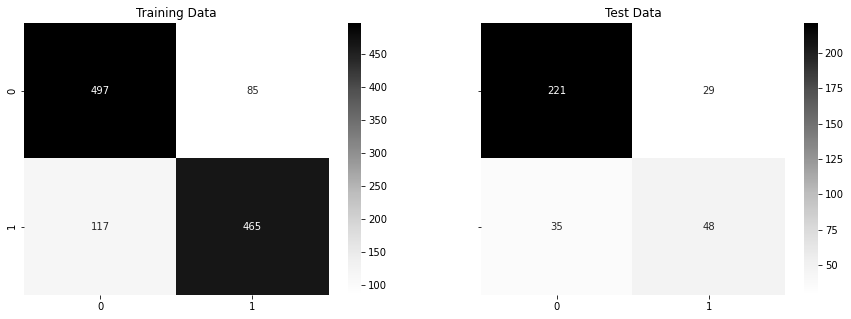

In [93]:
rcParams['figure.figsize'] = 15,5

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,lda_laptop_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,lda_laptop_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [94]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,lda_laptop_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,lda_laptop_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.81      0.85      0.83       582
           1       0.85      0.80      0.82       582

    accuracy                           0.83      1164
   macro avg       0.83      0.83      0.83      1164
weighted avg       0.83      0.83      0.83      1164
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87       250
           1       0.62      0.58      0.60        83

    accuracy                           0.81       333
   macro avg       0.74      0.73      0.74       333
weighted avg       0.80      0.81      0.81       333
 



### Probability prediction for the training and test data

In [95]:
# Training Data Probability Prediction
pred_prob_lda_laptop_train = lda_sm_laptop_model.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_lda_laptop_test = lda_sm_laptop_model.predict_proba(X_test)

AUC for the Training Data: 0.899
AUC for the Test Data: 0.805


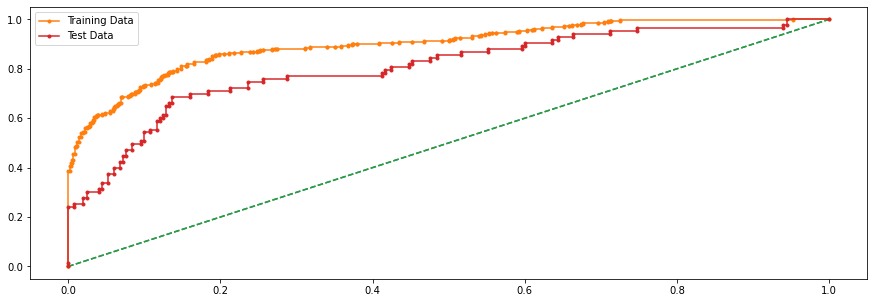

In [96]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train_res,pred_prob_lda_laptop_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_lda_laptop_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_lda_laptop_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_lda_laptop_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [97]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(Y_test, lda_laptop_test_predict),
                    "recall_on_true": 0.58,
                    "recall_on_false": 0.88,
                    "auc_score": 0.805
                   },index=['lda_sm_laptop_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778
lda_laptop_model,0.810811,0.42,0.94,0.817
naivebayes_sm_mobile_model,0.473553,0.72,0.43,NaN
naivebayes_sm_laptop_model,0.579580,0.82,0.48,NaN
lda_sm_mobile_model,0.847355,0.32,0.94,0.773
lda_sm_laptop_model,0.807808,0.58,0.88,0.805


## Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier

### For Mobile Dataset

In [98]:
X = social_media_data_mobile.drop('Buy_ticket',axis=1) # Predictor feature columns

Y = social_media_data_mobile['Buy_ticket'] # Predicted class (1=True, 0=False)

In [99]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3,random_state=1,stratify = Y)

In [100]:
## Let's check the shape before SMOTE
X_train.shape

(6570, 21)

In [101]:
sm = SMOTE(random_state=1)

In [102]:
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

In [103]:
## Let's check the shape after SMOTE
X_train_res.shape

(11144, 21)

In [108]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy' )

In [109]:
dt_mobile_model = decision_tree.fit(X_train_res, y_train_res)

In [111]:
train_char_label = ['No', 'Yes']

In [112]:
from IPython.display import Image  
from sklearn import tree
from os import system

Mobile_Data_DT = open('mobile_data_tree.dot','w')
dot_data = tree.export_graphviz(dt_mobile_model, out_file=Mobile_Data_DT, feature_names = list(X_train_res), class_names = list(train_char_label))

Mobile_Data_DT.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_mobile_model.feature_importances_, columns = ["Imp"], index = X_train_res.columns))

                                                   Imp
UserID                                        0.006580
Yearly_avg_view_on_travel_page                0.097109
total_likes_on_outstation_checkin_given       0.157853
yearly_avg_Outstation_checkins                0.054129
member_in_family                              0.029679
Yearly_avg_comment_on_travel_page             0.042605
total_likes_on_outofstation_checkin_received  0.094341
week_since_last_outstation_checkin            0.076669
following_company_page                        0.038257
montly_avg_comment_on_company_page            0.007346
working_flag                                  0.004741
travelling_network_rating                     0.037855
number_of_adults                              0.284209
Daily_Avg_mins_spend_on_traveling_page        0.041927
location__Beach                               0.006707
location__Entertainment                       0.005125
location__Financial                           0.004417
location__

### Performance of our model with training data

In [116]:
dt_mobile_train_predict = dt_mobile_model.predict(X_train_res)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_res, dt_mobile_train_predict)))

Model Accuracy: 1.0000


### Performance of our model with testing data

In [117]:
dt_mobile_test_predict = dt_mobile_model.predict(X_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_test, dt_mobile_test_predict)))

Model Accuracy: 0.9542


### Training Data and Test Data Confusion Matrix Comparison

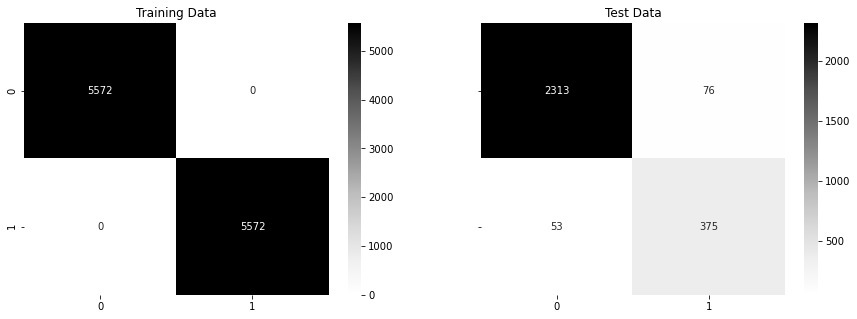

In [118]:
rcParams['figure.figsize'] = 15,5

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_res,dt_mobile_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,dt_mobile_test_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [119]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,dt_mobile_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,dt_mobile_test_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5572
           1       1.00      1.00      1.00      5572

    accuracy                           1.00     11144
   macro avg       1.00      1.00      1.00     11144
weighted avg       1.00      1.00      1.00     11144
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2389
           1       0.83      0.88      0.85       428

    accuracy                           0.95      2817
   macro avg       0.90      0.92      0.91      2817
weighted avg       0.96      0.95      0.95      2817
 



### Probability prediction for the training and test data

In [120]:
# Training Data Probabilaity Prediction
pred_prob_dt_mobile_train = dt_mobile_model.predict_proba(X_train_res)

# Test Data Probability Prediction
pred_prob_dt_mobile_test = dt_mobile_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.922


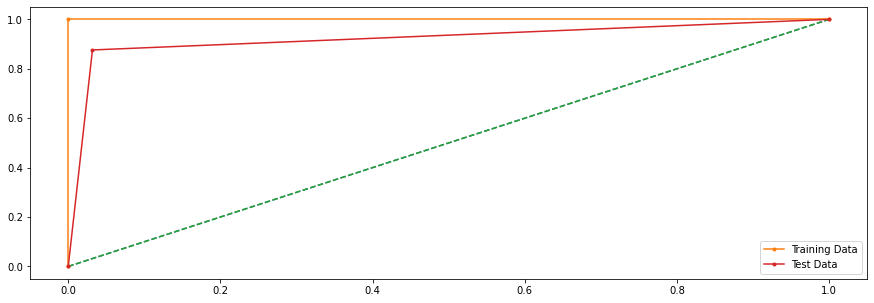

In [121]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train_res,pred_prob_dt_mobile_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_res,pred_prob_dt_mobile_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_dt_mobile_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_dt_mobile_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [122]:
df = pd.DataFrame({"accuracy": metrics.accuracy_score(Y_test, dt_mobile_test_predict),
                    "recall_on_true": 0.88,
                    "recall_on_false": 0.97,
                    "auc_score": 0.922
                   },index=['dt_mobile_model'])

predictions_test = pd.concat([predictions_test, df])
predictions_test

,accuracy,recall_on_true,recall_on_false,auc_score
naivebayes_mobile_model,0.858715,0.19,0.98,NaN
naivebayes_laptop_model,0.819820,0.59,0.91,NaN
lda_mobile_model,0.862620,0.19,0.98,0.778
lda_laptop_model,0.810811,0.42,0.94,0.817
naivebayes_sm_mobile_model,0.473553,0.72,0.43,NaN
naivebayes_sm_laptop_model,0.579580,0.82,0.48,NaN
lda_sm_mobile_model,0.847355,0.32,0.94,0.773
lda_sm_laptop_model,0.807808,0.58,0.88,0.805
dt_mobile_model,0.954207,0.88,0.97,0.922


### For Laptop Dataset